In [1]:
from fastai.vision import *
from experiments import *
from dataset import *
from metrics import *
from config import *

%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 500

In [2]:
random_seed(42)
allData = (SegItemListCustom.from_folder(MANGA109_PATH)
       .filter_by_func(lambda x: Path(get_segmentation(x)).exists() and Path(x).parent.name in (trainFolders)))

In [3]:
CSV_PATH = Path(EXPERIMENTS_PATH) / 'craft' / 'metrics.csv'

if not (CSV_PATH).exists():
    for index, dataset in enumerate(getDatasets(allData, crop=False, cutInHalf = False)):
        m = MetricsCallback(None)
        m.on_train_begin()
        for idx in range(len(dataset.valid.x.items)):
            pred = dataset.valid.y.craftImage(idx)
            truth = dataset.valid.y[idx].boxed
            m.on_batch_end(False, pred.px, truth.px)
        m.calculateMetrics()
        m.save(CSV_PATH, True)  

In [4]:
df = pd.read_csv(CSV_PATH, index_col=False)

In [5]:
df

,#truth,#pred,#fp no intersect,#intersections,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard #coverage 0.4-0.5,ignore hard #cover

In [6]:
printStats(df)

 & $45.18 \pm 2.8$ & $43.40 \pm 1.3$ & $73.72 \pm 5.2$ & $78.55 \pm 1.0$ \\
 & $30.54 \pm 1.1$ & $98.00 \pm 0.4$ & $82.17 \pm 0.6$ & $98.17 \pm 0.4$ \\
 & $99.88 \pm 0.0$ & $76.74 \pm 1.7$ \\


In [7]:
CSV_PATH = Path(EXPERIMENTS_PATH) / 'craft' / 'our metrics.csv'
MODEL_PATH = Path(EXPERIMENTS_PATH) / 'model' / 'resnet34'

if not (CSV_PATH).exists():
    for index, dataset in enumerate(getDatasets(allData, crop=False, cutInHalf = False)): 
        random_seed(42)
        learn = load_learner(MODEL_PATH / str(index), 'final refined model 2.pkl')
        m = MetricsCallback(None)
        m.on_train_begin()
        for idx in range(len(dataset.valid.x.items)):     
            pred = learn.predict(dataset.valid.x[idx])[2]
            pred = CustomImageSegment(torch.sigmoid(pred) > 0.5)
            m.on_batch_end(False, pred.boxed.px, dataset.valid.y[idx].boxed.px)
        m.calculateMetrics()
        m.save(CSV_PATH, True)

In [8]:
df = pd.read_csv(CSV_PATH, index_col=False)

In [9]:
df

,#truth,#pred,#fp no intersect,#intersections,global precision quantity %,global recall quantity %,easy #intersections,easy #truth,hard #intersections,hard #truth,normal easy #coverage 0.0-0.1,normal easy #coverage 0.1-0.2,normal easy #coverage 0.2-0.3,normal easy #coverage 0.3-0.4,normal easy #coverage 0.4-0.5,normal easy #coverage 0.5-0.6,normal easy #coverage 0.6-0.7,normal easy #coverage 0.7-0.8,normal easy #coverage 0.8-0.9,normal easy #coverage 0.9-1.0,normal easy #accuracy 0.0-0.1,normal easy #accuracy 0.1-0.2,normal easy #accuracy 0.2-0.3,normal easy #accuracy 0.3-0.4,normal easy #accuracy 0.4-0.5,normal easy #accuracy 0.5-0.6,normal easy #accuracy 0.6-0.7,normal easy #accuracy 0.7-0.8,normal easy #accuracy 0.8-0.9,normal easy #accuracy 0.9-1.0,normal easy #f1 0.0-0.1,normal easy #f1 0.1-0.2,normal easy #f1 0.2-0.3,normal easy #f1 0.3-0.4,normal easy #f1 0.4-0.5,normal easy #f1 0.5-0.6,normal easy #f1 0.6-0.7,normal easy #f1 0.7-0.8,normal easy #f1 0.8-0.9,normal easy #f1 0.9-1.0,normal easy #fn,normal easy #fp,normal easy #tp expanded,normal easy #tp eroded,normal easy global recall quantity %,normal easy global quality precision %,normal easy global quality recall %,normal easy global precision %,normal easy global recall %,normal easy global f1 %,normal #fn,normal #fp,normal #tp expanded,normal #tp eroded,normal hard #coverage 0.0-0.1,normal hard #coverage 0.1-0.2,normal hard #coverage 0.2-0.3,normal hard #coverage 0.3-0.4,normal hard #coverage 0.4-0.5,normal hard #coverage 0.5-0.6,normal hard #coverage 0.6-0.7,normal hard #coverage 0.7-0.8,normal hard #coverage 0.8-0.9,normal hard #coverage 0.9-1.0,normal hard #accuracy 0.0-0.1,normal hard #accuracy 0.1-0.2,normal hard #accuracy 0.2-0.3,normal hard #accuracy 0.3-0.4,normal hard #accuracy 0.4-0.5,normal hard #accuracy 0.5-0.6,normal hard #accuracy 0.6-0.7,normal hard #accuracy 0.7-0.8,normal hard #accuracy 0.8-0.9,normal hard #accuracy 0.9-1.0,normal hard #f1 0.0-0.1,normal hard #f1 0.1-0.2,normal hard #f1 0.2-0.3,normal hard #f1 0.3-0.4,normal hard #f1 0.4-0.5,normal hard #f1 0.5-0.6,normal hard #f1 0.6-0.7,normal hard #f1 0.7-0.8,normal hard #f1 0.8-0.9,normal hard #f1 0.9-1.0,normal hard #fn,normal hard #fp,normal hard #tp expanded,normal hard #tp eroded,normal hard global recall quantity %,normal hard global quality precision %,normal hard global quality recall %,normal hard global precision %,normal hard global recall %,normal hard global f1 %,normal global quality precision %,normal global quality recall %,normal global precision %,normal global recall %,normal global f1 score %,normal pixel precision %,normal pixel recall %,normal pixel f1 %,ignore easy #coverage 0.0-0.1,ignore easy #coverage 0.1-0.2,ignore easy #coverage 0.2-0.3,ignore easy #coverage 0.3-0.4,ignore easy #coverage 0.4-0.5,ignore easy #coverage 0.5-0.6,ignore easy #coverage 0.6-0.7,ignore easy #coverage 0.7-0.8,ignore easy #coverage 0.8-0.9,ignore easy #coverage 0.9-1.0,ignore easy #accuracy 0.0-0.1,ignore easy #accuracy 0.1-0.2,ignore easy #accuracy 0.2-0.3,ignore easy #accuracy 0.3-0.4,ignore easy #accuracy 0.4-0.5,ignore easy #accuracy 0.5-0.6,ignore easy #accuracy 0.6-0.7,ignore easy #accuracy 0.7-0.8,ignore easy #accuracy 0.8-0.9,ignore easy #accuracy 0.9-1.0,ignore easy #f1 0.0-0.1,ignore easy #f1 0.1-0.2,ignore easy #f1 0.2-0.3,ignore easy #f1 0.3-0.4,ignore easy #f1 0.4-0.5,ignore easy #f1 0.5-0.6,ignore easy #f1 0.6-0.7,ignore easy #f1 0.7-0.8,ignore easy #f1 0.8-0.9,ignore easy #f1 0.9-1.0,ignore easy #fn,ignore easy #fp,ignore easy #tp expanded,ignore easy #tp eroded,ignore easy global recall quantity %,ignore easy global quality precision %,ignore easy global quality recall %,ignore easy global precision %,ignore easy global recall %,ignore easy global f1 %,ignore #fn,ignore #fp,ignore #tp expanded,ignore #tp eroded,ignore hard #coverage 0.0-0.1,ignore hard #coverage 0.1-0.2,ignore hard #coverage 0.2-0.3,ignore hard #coverage 0.3-0.4,ignore hard #coverage 0.4-0.5,ignore hard #cover

In [10]:
printStats(df)

 & $57.63 \pm 1.6$ & $65.96 \pm 1.7$ & $83.89 \pm 0.6$ & $87.96 \pm 0.7$ \\
 & $54.84 \pm 2.8$ & $96.55 \pm 1.4$ & $89.67 \pm 1.0$ & $97.24 \pm 1.2$ \\
 & $94.69 \pm 0.9$ & $93.86 \pm 1.3$ \\


In [14]:
ds = getDatasets(allData, crop=False, cutInHalf = False)[0]

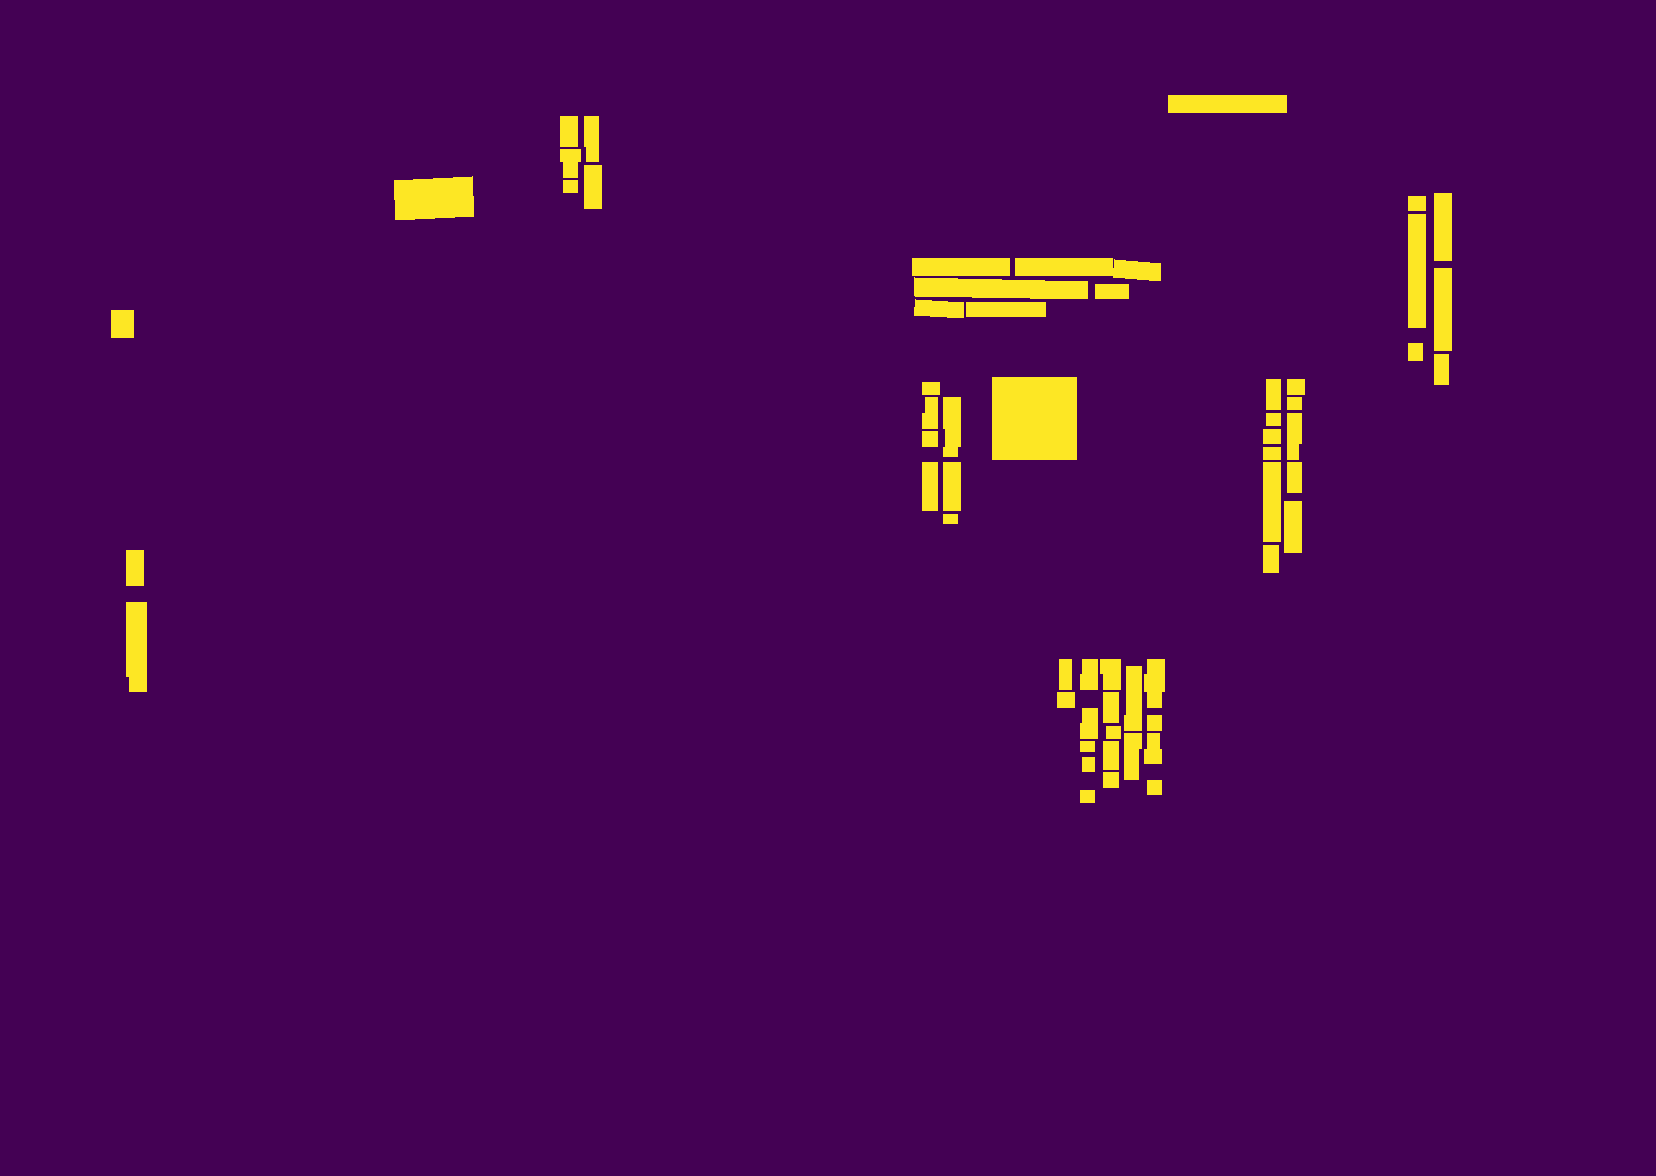

In [15]:
ds.valid.y.craftImage(62)

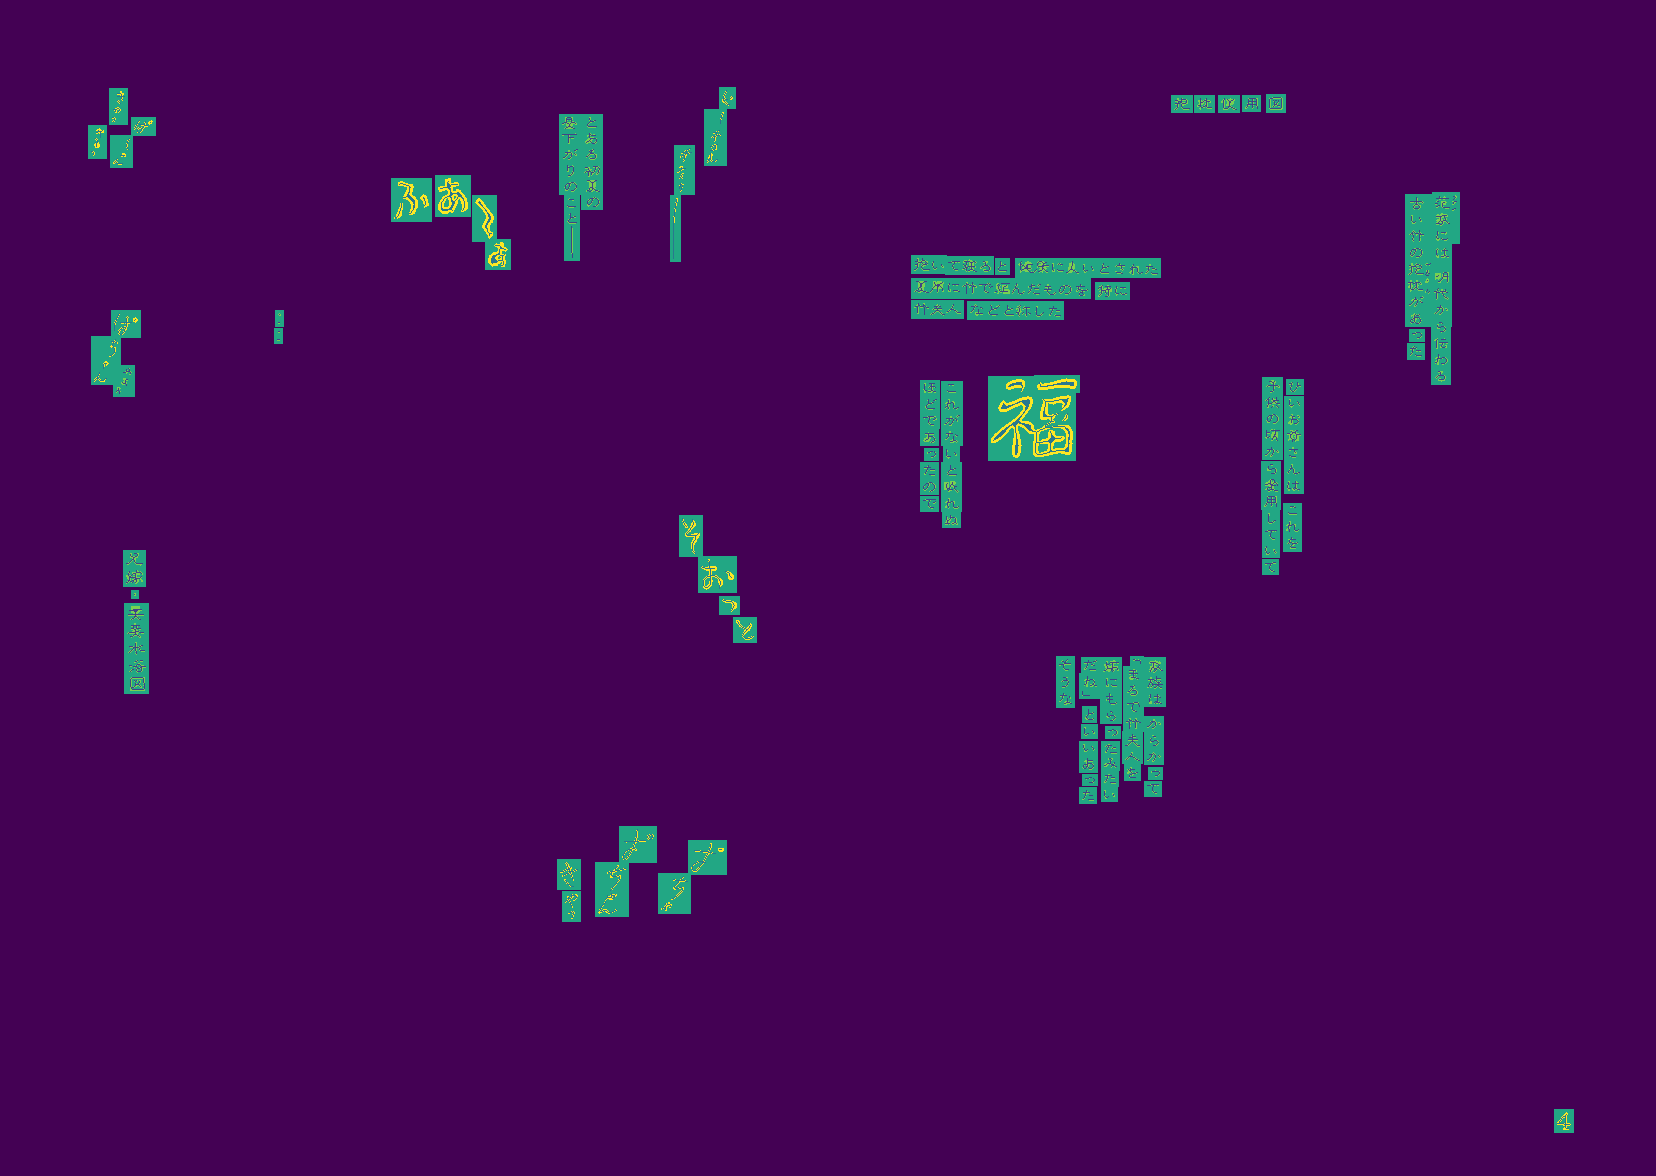

In [12]:
ds.valid.y[62].boxed

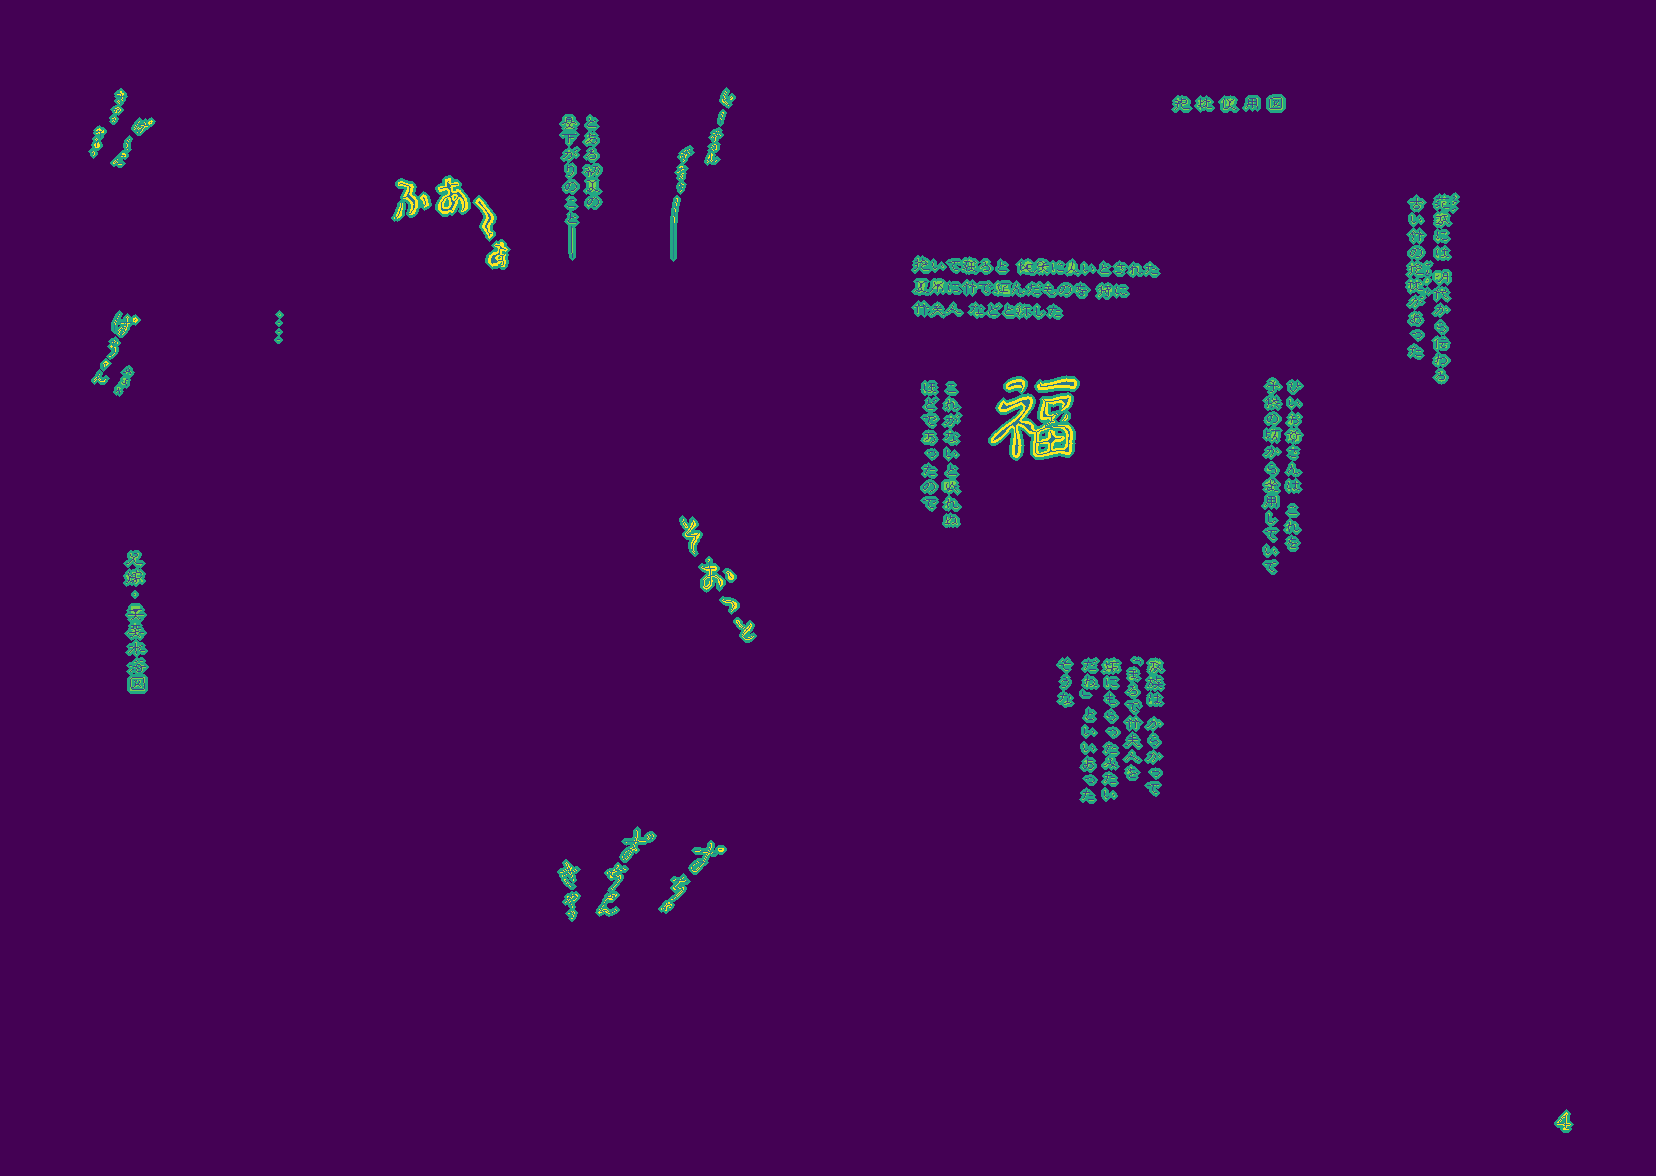

In [13]:
ds.valid.y[62]